In [2]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [3]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p3_FS.csv'
data3 = pd.read_csv(file)

In [4]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p5_FS.csv'
data5 = pd.read_csv(file)

In [5]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p7_FS.csv'
data7 = pd.read_csv(file)

In [6]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p8_FS.csv'
data8 = pd.read_csv(file)

In [7]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p9_FS.csv'
data9 = pd.read_csv(file)

In [8]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p10_FS.csv'
data10 = pd.read_csv(file)

In [9]:
data = [data3, data5, data7, data8, data9, data10]

In [9]:
# Engagement By Participant 
overall_engagement = []
for i in range(0, len(data)):
    counts = data[i]['engagement'].value_counts()
    #print(data[i]['engagement'].unique())
    #print(counts[1]+counts[0], len(data[i]))
    overall_engagement.append((counts[1]/len(data[i]))*100)
    #print(round((counts[1]/len(data[i]))*100, 3), end='%\n')
    #print(round(((counts[0]/len(data[i]))*100), 3), end='%\n')
    #print()

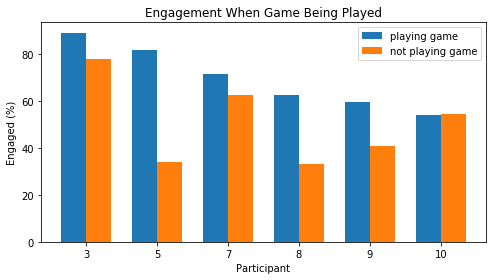

In [15]:
# Engagement when game, without game 

engagement_game = []
engagement_no_game = []

for i in range(0, len(data)):
    d = data[i]
    
    d_no_game = d.loc[d['no_game'] == 1]
    d_game = d.loc[d['no_game'] == 0]
    
    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    counts_no_game = d_no_game['engagement'].value_counts()
    counts_game = d_game['engagement'].value_counts()
    
    engagement_game.append(((counts_game[1]/len(d_game))*100))
    engagement_no_game.append(((counts_no_game[1]/len(d_no_game))*100))

    
    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.35

rects1 = ax.bar(index, engagement_game, bar_width, label='playing game')
rects2 = ax.bar(index+bar_width, engagement_no_game, bar_width, label='not playing game')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement When Game Being Played')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()

plt.show()


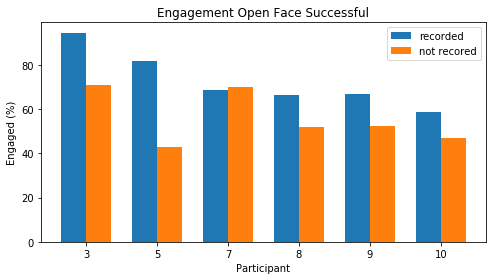

In [58]:
# Engagement when open face success 

engagement_game = []
engagement_no_game = []

for i in range(0, len(data)):
    d = data[i]
    
    d_no_game = d.loc[(d['of_success'].isna()) | (d['of_success'] == 0)]
    d_game = d.loc[d['of_success'] == 1]
    
    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    counts_no_game = d_no_game['engagement'].value_counts()
    counts_game = d_game['engagement'].value_counts()
    
    engagement_game.append(((counts_game[1]/len(d_game))*100))
    engagement_no_game.append(((counts_no_game[1]/len(d_no_game))*100))

    
    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.35

rects1 = ax.bar(index, engagement_game, bar_width, label='recorded')
rects2 = ax.bar(index+bar_width, engagement_no_game, bar_width, label='not recored')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement Open Face Successful')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()

plt.show()


In [ ]:
# How much data when confidence or sucess bad

for i in range(0, len(data)):
    d = data[i]
    
    curr = d.loc[(d['of_success'] == 0) | (d['of_success'].isna()) | (d['of_confidence'] <= 0.10) | (d['of_confidence'].isna())]
    
    print(round((len(curr)/len(d))*100, 3), end='%\n')
    print()

In [ ]:
# Continuous Poor Tracking 

for i in range(0, len(data)):
    d = data[i]
    
    curr = 0
    last = d.loc[0, 'of_success']
    last_sess = d.loc[0, 'session_num']
    
    track_en = []
    track_dis = []
    
    for i,r in d.iterrows():
        if (last != r['of_success']) or (last_sess != r['session_num']):
            # record this 
            if (last == 0):
                track_dis.append(curr)
            else:
                track_en.append(curr)
            
            curr = 0
            last = r['of_success']
            last_sess = r['session_num']
        
        curr += 1
    
    # grab last one 
    if (last == 0):
        track_dis.append(curr)
    else:
        track_en.append(curr)
     
    # Median Continuous Engagement
    print(round((np.median(track_en)/30), 3))
    print(round((np.median(track_dis)/30), 3))
    
    # St Dev Continuous Engagement 
    print(round((np.std(track_en)/30), 3))
    print(round((np.std(track_dis)/30), 3))
    
    print()

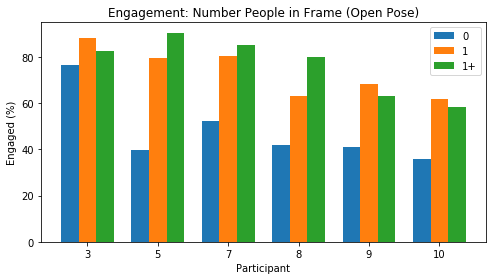

In [23]:
# Engagement with people (determined by op) 
engagement0 = []
engagement1 = []
engagement2 = []
for i in range(0, len(data)):
    d = data[i]
    
    c0 = d.loc[(d['op_Number of People'] < 1)]
    c1 = d.loc[(d['op_Number of People'] == 1)]
    c2 = d.loc[(d['op_Number of People'] > 1)]
    
    
    counts0 = c0['engagement'].value_counts()
    counts1 = c1['engagement'].value_counts()
    counts2 = c2['engagement'].value_counts()

    engagement0.append((counts0[1]/len(c0))*100)
    engagement1.append((counts1[1]/len(c1))*100)
    engagement2.append((counts2[1]/len(c2))*100)
    
    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.25

rects1 = ax.bar(index, engagement0, bar_width, label='0')
rects2 = ax.bar(index+bar_width, engagement1, bar_width, label='1')
rects3 = ax.bar(index+2*bar_width, engagement2, bar_width, label='1+')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement: Number People in Frame (Open Pose)')

ax.set_xticks(index+bar_width)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()



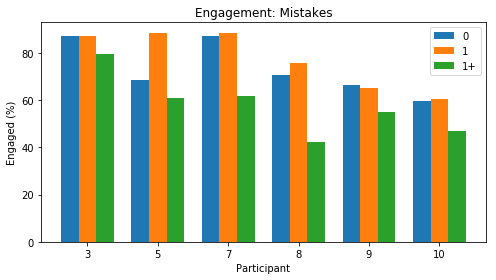

In [61]:
# Mistakes 
engagement0 = []
engagement1 = []
engagement2 = []
for i in range(0, len(data)):
    d = data[i]
    
    c0 = d.loc[(d['timestamp'] <= 5*60)]
    c1 = d.loc[(d['timestamp'] <= 10*60) & (d['timestamp'] > 5*60)]
    c2 = d.loc[(d['timestamp'] > 15*60)]
    
    
    counts0 = c0['engagement'].value_counts()
    counts1 = c1['engagement'].value_counts()
    counts2 = c2['engagement'].value_counts()

    engagement0.append((counts0[1]/len(c0))*100)
    engagement1.append((counts1[1]/len(c1))*100)
    engagement2.append((counts2[1]/len(c2))*100)
    
    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.25

rects1 = ax.bar(index, engagement0, bar_width, label='0')
rects2 = ax.bar(index+bar_width, engagement1, bar_width, label='1')
rects3 = ax.bar(index+2*bar_width, engagement2, bar_width, label='1+')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement: Mistakes')

ax.set_xticks(index+bar_width)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()



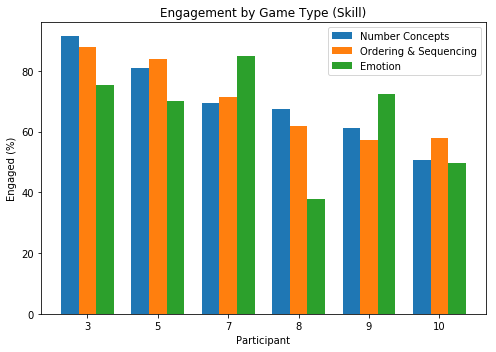

In [31]:
# Engagement by Game Type 

engagementNC = []
engagementOS = []
engagementEM = []
for i in range(0, len(data)):
    d = data[i]
    
    cNC = d.loc[(d['skill_NC'] == 1)]
    cOS = d.loc[(d['skill_OS'] == 1)]
    cEM = d.loc[(d['skill_EM'] == 1)]
    
    
    countsNC = cNC['engagement'].value_counts()
    countsOS = cOS['engagement'].value_counts()
    countsEM = cEM['engagement'].value_counts()

    engagementNC.append((countsNC[1]/len(cNC))*100)
    engagementOS.append((countsOS[1]/len(cOS))*100)
    engagementEM.append((countsEM[1]/len(cEM))*100)

plt.rcParams["figure.figsize"] = [7,5]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.25

rects1 = ax.bar(index, engagementNC, bar_width, label='Number Concepts')
rects2 = ax.bar(index+bar_width, engagementOS, bar_width, label='Ordering & Sequencing')
rects3 = ax.bar(index+2*bar_width, engagementEM, bar_width, label='Emotion')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement by Game Type (Skill)')

ax.set_xticks(index+bar_width)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()

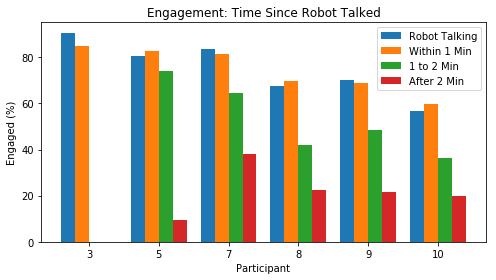

In [57]:
# Engagement: Robot Talking

engagement0 = []
engagement1 = []
engagement2 = []
engagement3 = []
for i in range(0, len(data)):
    d = data[i]
    
    c0 = d.loc[(d['ts_robot_talked'] == 0)]
    c1 = d.loc[(d['ts_robot_talked'] <= 60) & (d['ts_robot_talked'] > 0)]
    c2 = d.loc[(d['ts_robot_talked'] <= 120) & (d['ts_robot_talked'] > 60)]
    c3 = d.loc[(d['ts_robot_talked'] > 120)]
    
    
    counts0 = c0['engagement'].value_counts()
    counts1 = c1['engagement'].value_counts()
    counts2 = c2['engagement'].value_counts()
    counts3 = c3['engagement'].value_counts()

    try:
        engagement0.append((counts0[1]/len(c0))*100)
    except:
        engagement0.append(0)
    try:
        engagement1.append((counts1[1]/len(c1))*100)
    except:
        engagement1.append(0)
    try:
        engagement2.append((counts2[1]/len(c2))*100)
    except:
        engagement2.append(0)
    try:
        engagement3.append((counts3[1]/len(c3))*100)
    except:
        engagement3.append(0)

    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.2

rects1 = ax.bar(index, engagement0, bar_width, label='Robot Talking')
rects2 = ax.bar(index+bar_width, engagement1, bar_width, label='Within 1 Min')
rects3 = ax.bar(index+2*bar_width, engagement2, bar_width, label='1 to 2 Min')
rects4 = ax.bar(index+3*bar_width, engagement3, bar_width, label='After 2 Min')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement: Time Since Robot Talked')

ax.set_xticks(index+3*bar_width/2)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()


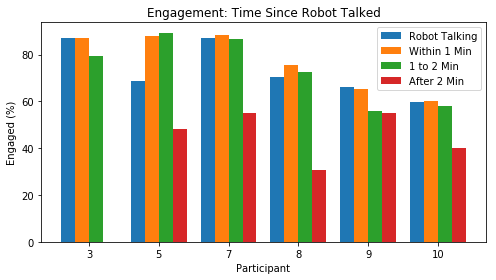

In [62]:
# Timestamp

engagement0 = []
engagement1 = []
engagement2 = []
engagement3 = []
for i in range(0, len(data)):
    d = data[i]
    
    c0 = d.loc[(d['timestamp'] <= 5*60)]
    c1 = d.loc[(d['timestamp'] <= 10*60) & (d['timestamp'] > 5*60)]
    c2 = d.loc[(d['timestamp'] <= 15*60) & (d['timestamp'] > 10*60)]
    c3 = d.loc[(d['timestamp'] > 15*60)]
    
    
    counts0 = c0['engagement'].value_counts()
    counts1 = c1['engagement'].value_counts()
    counts2 = c2['engagement'].value_counts()
    counts3 = c3['engagement'].value_counts()

    try:
        engagement0.append((counts0[1]/len(c0))*100)
    except:
        engagement0.append(0)
    try:
        engagement1.append((counts1[1]/len(c1))*100)
    except:
        engagement1.append(0)
    try:
        engagement2.append((counts2[1]/len(c2))*100)
    except:
        engagement2.append(0)
    try:
        engagement3.append((counts3[1]/len(c3))*100)
    except:
        engagement3.append(0)

    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.2

rects1 = ax.bar(index, engagement0, bar_width, label='Robot Talking')
rects2 = ax.bar(index+bar_width, engagement1, bar_width, label='Within 1 Min')
rects3 = ax.bar(index+2*bar_width, engagement2, bar_width, label='1 to 2 Min')
rects4 = ax.bar(index+3*bar_width, engagement3, bar_width, label='After 2 Min')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement: Time Since Robot Talked')

ax.set_xticks(index+3*bar_width/2)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()


9.4
30.566667000000024
57.56666699999971
43.30000000000001
51.33333300000004
19.100000000000023


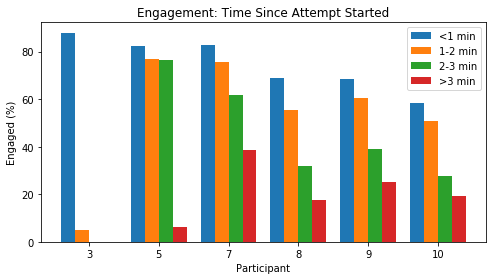

In [18]:
# Engagement: Time Since Game Started

engagement0 = []
engagement1 = []
engagement2 = []
engagement3 = []
engagement4 = []

for i in range(0, len(data)):
    d = data[i]
    
    print(np.nanmedian(d['ts_attempt']))
    
    c0 = d.loc[(d['ts_attempt'] <= 60)]
    c1 = d.loc[(d['ts_attempt'] <= 120) & (d['ts_attempt'] > 60)]
    c2 = d.loc[(d['ts_attempt'] <= 180) & (d['ts_attempt'] > 120)]
    c3 = d.loc[(d['ts_attempt'] > 180)]

    counts0 = c0['engagement'].value_counts()
    counts1 = c1['engagement'].value_counts()
    counts2 = c2['engagement'].value_counts()
    counts3 = c3['engagement'].value_counts()

    try:
        engagement0.append((counts0[1]/len(c0))*100)
    except:
        engagement0.append(0)
    try:
        engagement1.append((counts1[1]/len(c1))*100)
    except:
        engagement1.append(0)
    try:
        engagement2.append((counts2[1]/len(c2))*100)
    except:
        engagement2.append(0)
    try:
        engagement3.append((counts3[1]/len(c3))*100)
    except:
        engagement3.append(0)

    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.2

rects1 = ax.bar(index, engagement0, bar_width, label='<1 min')
rects2 = ax.bar(index+bar_width, engagement1, bar_width, label='1-2 min')
rects3 = ax.bar(index+2*bar_width, engagement2, bar_width, label='2-3 min')
rects4 = ax.bar(index+3*bar_width, engagement3, bar_width, label='>3 min')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement: Time Since Attempt Started')

ax.set_xticks(index+3*bar_width/2)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()


In [64]:
data3.tail(100)

,of_confidence,of_success,of_gaze_0_x,of_gaze_0_y,of_gaze_0_z,of_gaze_1_x,of_gaze_1_y,of_gaze_1_z,of_gaze_angle_x,of_gaze_angle_y,...,diff_1,diff_2,diff_3,diff_4,diff_5,skill_NC,skill_OS,skill_EM,no_game,engagement
139860,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0.0
139861,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0.0
139862,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0.0
139863,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0.0
139864,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0.0
139865,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0.0
139866,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0.0
139867,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0.0
139868,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0.0
139869,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0.0


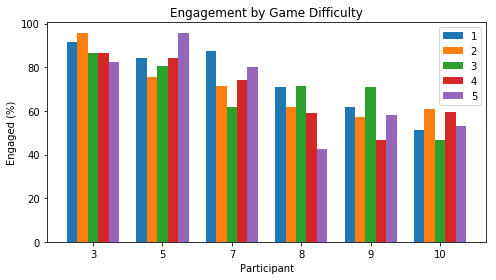

In [28]:
# Engagement with difficulty
engagement1 = []
engagement2 = []
engagement3 = []
engagement4 = []
engagement5 = []
for i in range(0, len(data)):
    d = data[i]
    
    c1 = d.loc[(d['diff_1'] == 1)]
    c2 = d.loc[(d['diff_2'] == 1)]
    c3 = d.loc[(d['diff_3'] == 1)]
    c4 = d.loc[(d['diff_4'] == 1)]
    c5 = d.loc[(d['diff_5'] == 1)]
    
    
    counts1 = c1['engagement'].value_counts()
    counts2 = c2['engagement'].value_counts()
    counts3 = c3['engagement'].value_counts()
    counts4 = c4['engagement'].value_counts()
    counts5 = c5['engagement'].value_counts()

    engagement1.append((counts1[1]/len(c1))*100)
    engagement2.append((counts2[1]/len(c2))*100)
    engagement3.append((counts3[1]/len(c3))*100)
    engagement4.append((counts4[1]/len(c4))*100)
    engagement5.append((counts5[1]/len(c5))*100)
    
    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.15

rects1 = ax.bar(index, engagement1, bar_width, label='1')
rects2 = ax.bar(index+bar_width, engagement2, bar_width, label='2')
rects3 = ax.bar(index+2*bar_width, engagement3, bar_width, label='3')
rects4 = ax.bar(index+3*bar_width, engagement4, bar_width, label='4')
rects5 = ax.bar(index+4*bar_width, engagement5, bar_width, label='5')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement by Game Difficulty')

ax.set_xticks(index+2*bar_width)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()



In [ ]:
# Session Mistakes: 

engagement0 = []
engagement1 = []
engagement2 = []
engagement3 = []
engagement4 = []

for i in range(0, len(data)):
    d = data[i]
    
    print(np.nanmedian(d['ts_attempt']))
    
    c0 = d.loc[(d['ts_attempt'] <= 60)]
    c1 = d.loc[(d['ts_attempt'] <= 120) & (d['ts_attempt'] > 60)]
    c2 = d.loc[(d['ts_attempt'] <= 180) & (d['ts_attempt'] > 120)]
    c3 = d.loc[(d['ts_attempt'] > 180)]

    counts0 = c0['engagement'].value_counts()
    counts1 = c1['engagement'].value_counts()
    counts2 = c2['engagement'].value_counts()
    counts3 = c3['engagement'].value_counts()

    try:
        engagement0.append((counts0[1]/len(c0))*100)
    except:
        engagement0.append(0)
    try:
        engagement1.append((counts1[1]/len(c1))*100)
    except:
        engagement1.append(0)
    try:
        engagement2.append((counts2[1]/len(c2))*100)
    except:
        engagement2.append(0)
    try:
        engagement3.append((counts3[1]/len(c3))*100)
    except:
        engagement3.append(0)

    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.2

rects1 = ax.bar(index, engagement0, bar_width, label='<1 min')
rects2 = ax.bar(index+bar_width, engagement1, bar_width, label='1-2 min')
rects3 = ax.bar(index+2*bar_width, engagement2, bar_width, label='2-3 min')
rects4 = ax.bar(index+3*bar_width, engagement3, bar_width, label='>3 min')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement: Time Since Attempt Started')

ax.set_xticks(index+3*bar_width/2)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()


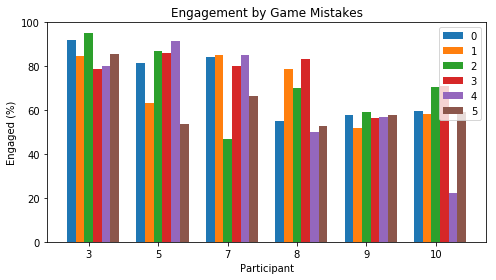

In [43]:
# Engagement with mistakes
engagement1 = []
engagement2 = []
engagement3 = []
engagement4 = []
engagement5 = []
engagement6 = []
for i in range(0, len(data)):
    d = data[i]
    
    c1 = d.loc[(d['mistakes_game'] == 0)]
    c2 = d.loc[(d['mistakes_game'] == 1)]
    c3 = d.loc[(d['mistakes_game'] == 2)]
    c4 = d.loc[(d['mistakes_game'] == 3)]
    c5 = d.loc[(d['mistakes_game'] == 4)]
    c6 = d.loc[(d['mistakes_game'] >= 5)]
   
    
    counts1 = c1['engagement'].value_counts()
    counts2 = c2['engagement'].value_counts()
    counts3 = c3['engagement'].value_counts()
    counts4 = c4['engagement'].value_counts()
    counts5 = c5['engagement'].value_counts()
    counts6 = c6['engagement'].value_counts()

    engagement1.append((counts1[1]/len(c1))*100)
    engagement2.append((counts2[1]/len(c2))*100)
    engagement3.append((counts3[1]/len(c3))*100)
    engagement4.append((counts4[1]/len(c4))*100)
    engagement5.append((counts5[1]/len(c5))*100)
    engagement6.append((counts6[1]/len(c6))*100)
    
    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.125

rects1 = ax.bar(index, engagement1, bar_width, label='0')
rects2 = ax.bar(index+bar_width, engagement2, bar_width, label='1')
rects3 = ax.bar(index+2*bar_width, engagement3, bar_width, label='2')
rects4 = ax.bar(index+3*bar_width, engagement4, bar_width, label='3')
rects5 = ax.bar(index+4*bar_width, engagement5, bar_width, label='4')
rects5 = ax.bar(index+5*bar_width, engagement6, bar_width, label='5')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement by Game Mistakes')

ax.set_xticks(index+2*bar_width)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()



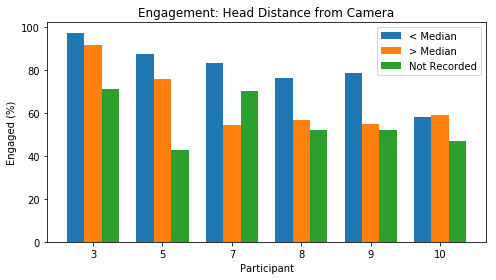

In [54]:
# Engagement: Pose Distance

engagement0 = []
engagement1 = []
engagement2 = []
for i in range(0, len(data)):
    d = data[i]
    
    c0 = d.loc[(d['of_pose_distance'].isna())]
    c1 = d.loc[(d['of_pose_distance'] <= np.nanquantile(d['of_pose_distance'], 1/2))]
    c2 = d.loc[(d['of_pose_distance'] > np.nanquantile(d['of_pose_distance'], 1/2))]
    
    
    counts0 = c0['engagement'].value_counts()
    counts1 = c1['engagement'].value_counts()
    counts2 = c2['engagement'].value_counts()

    try:
        engagement0.append((counts0[1]/len(c0))*100)
    except:
        engagement0.append(0)
    try:
        engagement1.append((counts1[1]/len(c1))*100)
    except:
        engagement1.append(0)
    try:
        engagement2.append((counts2[1]/len(c2))*100)
    except:
        engagement2.append(0)

    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.25

rects1 = ax.bar(index, engagement1, bar_width, label='< Median')
rects2 = ax.bar(index+bar_width, engagement2 , bar_width, label='> Median')
rects3 = ax.bar(index+2*bar_width, engagement0, bar_width, label='Not Recorded')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement: Head Distance from Camera')

ax.set_xticks(index+bar_width)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()


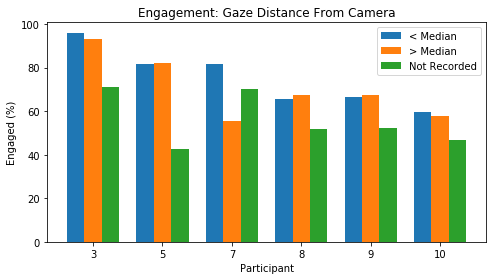

In [53]:
# Engagement: Gaze Distance

engagement0 = []
engagement1 = []
engagement2 = []
for i in range(0, len(data)):
    d = data[i]
    
    c0 = d.loc[(d['of_gaze_distance'].isna())]
    c1 = d.loc[(d['of_gaze_distance'] <= np.nanquantile(d['of_gaze_distance'], 1/2))]
    c2 = d.loc[(d['of_gaze_distance'] > np.nanquantile(d['of_gaze_distance'], 1/2))]
    
    
    counts0 = c0['engagement'].value_counts()
    counts1 = c1['engagement'].value_counts()
    counts2 = c2['engagement'].value_counts()

    try:
        engagement0.append((counts0[1]/len(c0))*100)
    except:
        engagement0.append(0)
    try:
        engagement1.append((counts1[1]/len(c1))*100)
    except:
        engagement1.append(0)
    try:
        engagement2.append((counts2[1]/len(c2))*100)
    except:
        engagement2.append(0)

    #print(round((len(curr)/len(d))*100, 3), end='%\n')

    #print(round(((counts[1]/len(curr))*100), 3), end='%\n')
    #print(round(((counts[0]/len(curr))*100), 3), end='%\n')
    #print()

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.25

rects1 = ax.bar(index, engagement1, bar_width, label='< Median')
rects2 = ax.bar(index+bar_width, engagement2 , bar_width, label='> Median')
rects3 = ax.bar(index+2*bar_width, engagement0, bar_width, label='Not Recorded')

ax.set_xlabel('Participant')
ax.set_ylabel('Engaged (%)')
ax.set_title('Engagement: Gaze Distance From Camera')

ax.set_xticks(index+bar_width)
ax.set_xticklabels(('3', '5', '7', '8', '9', '10'))
ax.legend()
fig.tight_layout()


In [ ]:
# Engagement When Robot Talking 

In [27]:
action_cols = []
for i in data3.columns:
    if 'AU' in i:
        action_cols.append(i)

In [28]:
action_cols

['of_AU01_c',
 'of_AU02_c',
 'of_AU04_c',
 'of_AU05_c',
 'of_AU06_c',
 'of_AU07_c',
 'of_AU09_c',
 'of_AU10_c',
 'of_AU12_c',
 'of_AU14_c',
 'of_AU15_c',
 'of_AU17_c',
 'of_AU20_c',
 'of_AU23_c',
 'of_AU25_c',
 'of_AU26_c',
 'of_AU28_c',
 'of_AU45_c']

In [40]:
import operator
master = {}
for i in range(0, len(data)):
    d = data[i]
    
    save = {}
    
    for j in action_cols:
        c1 = d.loc[d[j]==1]
        c2 = d.loc[d[j]==0]
        
        counts1 = c1['engagement'].value_counts()
        counts2 = c2['engagement'].value_counts()
        
        e1 = (counts1[0]/len(c1))*100
        e2 = (counts2[0]/len(c2))*100
        #save[j] = np.abs(e1-e2)
        save[j] = max(e1, e2)
        #(counts[0]/len(curr))*100

    sorted_save = sorted(save.items(), key=operator.itemgetter(1), reverse=True)
    for i,v in enumerate(sorted_save):
        if i > 5:
            break
        print(i,v)
        
        if v[0] not in master:
            master[v[0]] = 0
        master[v[0]] += 1
    print()
print(master)

0 ('of_AU04_c', 23.553410245681153)
1 ('of_AU28_c', 20.05830094392004)
2 ('of_AU07_c', 18.039065083581356)
3 ('of_AU15_c', 17.993797501528785)
4 ('of_AU14_c', 17.560522745126043)
5 ('of_AU10_c', 17.22448818353299)

0 ('of_AU14_c', 43.677997362069625)
1 ('of_AU02_c', 38.02499415509081)
2 ('of_AU25_c', 37.85194954798534)
3 ('of_AU04_c', 37.503675326944304)
4 ('of_AU26_c', 36.3784341595436)
5 ('of_AU01_c', 36.342191663016436)

0 ('of_AU05_c', 53.17573172176798)
1 ('of_AU10_c', 48.14577578499273)
2 ('of_AU17_c', 46.276468589977476)
3 ('of_AU23_c', 46.115278113826385)
4 ('of_AU28_c', 40.714364276286844)
5 ('of_AU15_c', 36.029293117358655)

0 ('of_AU14_c', 46.84420270343045)
1 ('of_AU04_c', 45.821623934589276)
2 ('of_AU07_c', 45.61958853969456)
3 ('of_AU06_c', 45.08592820285512)
4 ('of_AU15_c', 44.846142658272555)
5 ('of_AU26_c', 44.770070224857434)

0 ('of_AU14_c', 45.40175403905877)
1 ('of_AU26_c', 44.49834352499987)
2 ('of_AU02_c', 44.40733057621923)
3 ('of_AU01_c', 44.376820790908305)
4 